# Average method, Naive method, Seasonal naive method, Drift method

위 메소드들을 적용해보기 위해 train 데이터셋과 test 데이터셋을 나눠 실습을 진행할겁니다. 우리가 가지고 있는 전체 데이터셋에서 나누는 것이므로 test 데이터셋 전체 데이터 개수를 보고 h를 정해서 명시해줘야 합니다.<br/>
학습데이터와 테스트데이터(마지막h=10)를 나누어 계산한 것입니다.<br/>

테스트시의 RMSE값이 더 작으니 이상한 결과를 얻었습니다.ㅎㅎ<br/>

Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'fpp2' was built under R version 3.6.3"
Loading required package: ggplot2

Loading required package: fma

Warning message:
"package 'fma' was built under R version 3.6.3"
Loading required package: expsmooth

Warning message:
"package 'expsmooth' was built under R version 3.6.3"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.000,43.62858,35.23438,-0.9365102,7.886776,2.463942,-0.10915105,NA
Test set,-13.775,38.44724,34.82500,-3.9698659,8.283390,2.435315,-0.06905715,0.801254


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.4761905,65.31511,54.73016,-0.9162496,12.16415,3.827284,-0.24098292,NA
Test set,-51.4000000,62.69290,57.40000,-12.9549160,14.18442,4.013986,-0.06905715,1.254009


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-2.133333,16.78193,14.3,-0.5537713,3.313685,1.0000000,-0.2876333,NA
Test set,5.200000,14.31084,13.4,1.1475536,3.168503,0.9370629,0.1318407,0.298728


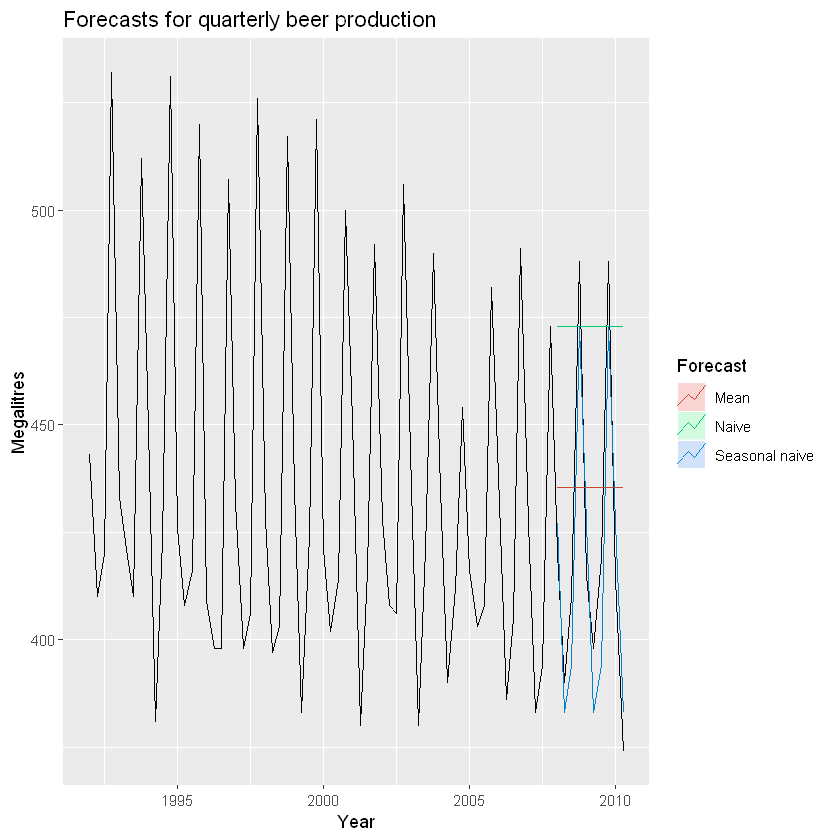

In [1]:
library(forecast)
library(fpp2)
beer2 <- window(ausbeer,start=1992,end=c(2007,4))
beerfit1 <- meanf(beer2,h=10)
beerfit2 <- rwf(beer2,h=10)
beerfit3 <- snaive(beer2,h=10)
autoplot(window(ausbeer, start=1992)) +
autolayer(beerfit1, series="Mean", PI=FALSE) + autolayer(beerfit2, series="Naive",PI=FALSE) + autolayer(beerfit3, series="Seasonal naive", PI=FALSE) + xlab("Year") + ylab("Megalitres") + ggtitle("Forecasts for quarterly beer production") + guides(colour=guide_legend(title="Forecast"))
beer3 <- window(ausbeer, start=2008)
accuracy(beerfit1, beer3)
accuracy(beerfit2, beer3)
accuracy(beerfit3, beer3)